In [57]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time 

In [58]:
cols ="""duration, 
protocol_type, 
service, 
flag, 
src_bytes, 
dst_bytes, 
land, 
wrong_fragment, 
urgent, 
hot, 
num_failed_logins, 
logged_in, 
num_compromised, 
root_shell, 
su_attempted, 
num_root, 
num_file_creations, 
num_shells, 
num_access_files, 
num_outbound_cmds, 
is_host_login, 
is_guest_login, 
count, 
srv_count, 
serror_rate, 
srv_serror_rate, 
rerror_rate, 
srv_rerror_rate, 
same_srv_rate, 
diff_srv_rate, 
srv_diff_host_rate, 
dst_host_count, 
dst_host_srv_count, 
dst_host_same_srv_rate, 
dst_host_diff_srv_rate, 
dst_host_same_src_port_rate, 
dst_host_srv_diff_host_rate, 
dst_host_serror_rate, 
dst_host_srv_serror_rate, 
dst_host_rerror_rate, 
dst_host_srv_rerror_rate"""
  
columns =[] 
for c in cols.split(', '): 
    if(c.strip()): 
       columns.append(c.strip()) 
  
columns.append('target') 

In [59]:
columns[:5]

['duration', 'protocol_type', 'service', 'flag', 'src_bytes']

In [60]:
df = pd.read_csv('dataset.txt', sep= ',', header = None, names = columns, on_bad_lines='skip')

In [61]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [62]:
df.shape

(494020, 42)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  num_compromised              494020 non-null  int64  
 13 

In [64]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97277
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [66]:
attack_types = { 
'normal': 'normal', 
'back': 'dos', 
'buffer_overflow': 'u2r', 
'ftp_write': 'r2l', 
'guess_passwd': 'r2l', 
'imap': 'r2l', 
'ipsweep': 'probe', 
'land': 'dos', 
'loadmodule': 'u2r', 
'multihop': 'r2l', 
'neptune': 'dos', 
'nmap': 'probe', 
'perl': 'u2r', 
'phf': 'r2l', 
'pod': 'dos', 
'portsweep': 'probe', 
'rootkit': 'u2r', 
'satan': 'probe', 
'smurf': 'dos', 
'spy': 'r2l', 
'teardrop': 'dos', 
'warezclient': 'r2l', 
'warezmaster': 'r2l', 
} 

In [67]:
df['target'] = df['target'].apply(lambda x : attack_types[x[:-1]])

In [68]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [69]:
df['target'].value_counts()

dos       391458
normal     97277
probe       4107
r2l         1126
u2r           52
Name: target, dtype: int64

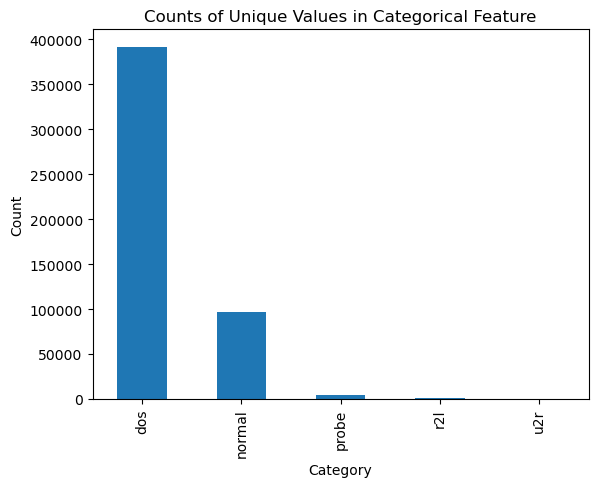

In [70]:
category_counts = df['target'].value_counts()

# Plotting the counts
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Unique Values in Categorical Feature')
plt.show()


In [71]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [72]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target'],
      dtype='object')

In [73]:
categorical_columns = df.select_dtypes(include='object').columns

In [74]:
categorical_columns

Index(['protocol_type', 'service', 'flag', 'target'], dtype='object')

In [75]:
print('Unique value counts in protocol_type: ')
print(df['protocol_type'].value_counts())
print()
print('Unique value counts in service: ')
print(df['service'].value_counts())
print()
print('Unique value counts in flag: ')
print(df['flag'].value_counts())

Unique value counts in protocol_type: 
icmp    283602
tcp     190064
udp      20354
Name: protocol_type, dtype: int64

Unique value counts in service: 
ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64

Unique value counts in flag: 
SF        378439
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64


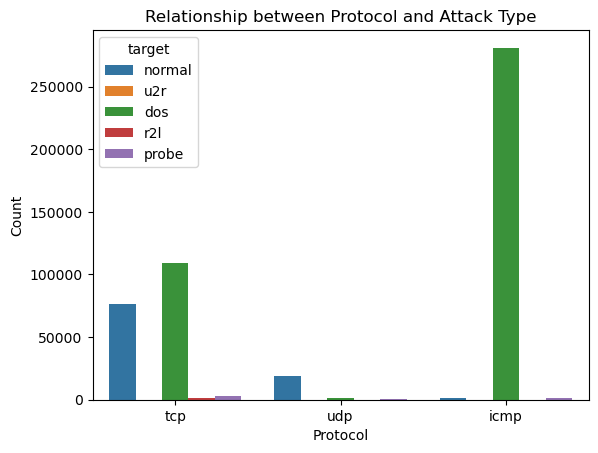

In [76]:
sns.countplot(x='protocol_type', hue='target', data=df)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Relationship between Protocol and Attack Type')
plt.show()

In [20]:
df['protocol_type'] = df['protocol_type'].map({'icmp': 1, 'tcp': 2, 'udp': 3})

In [21]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,2,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,2,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,2,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,2,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,2,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


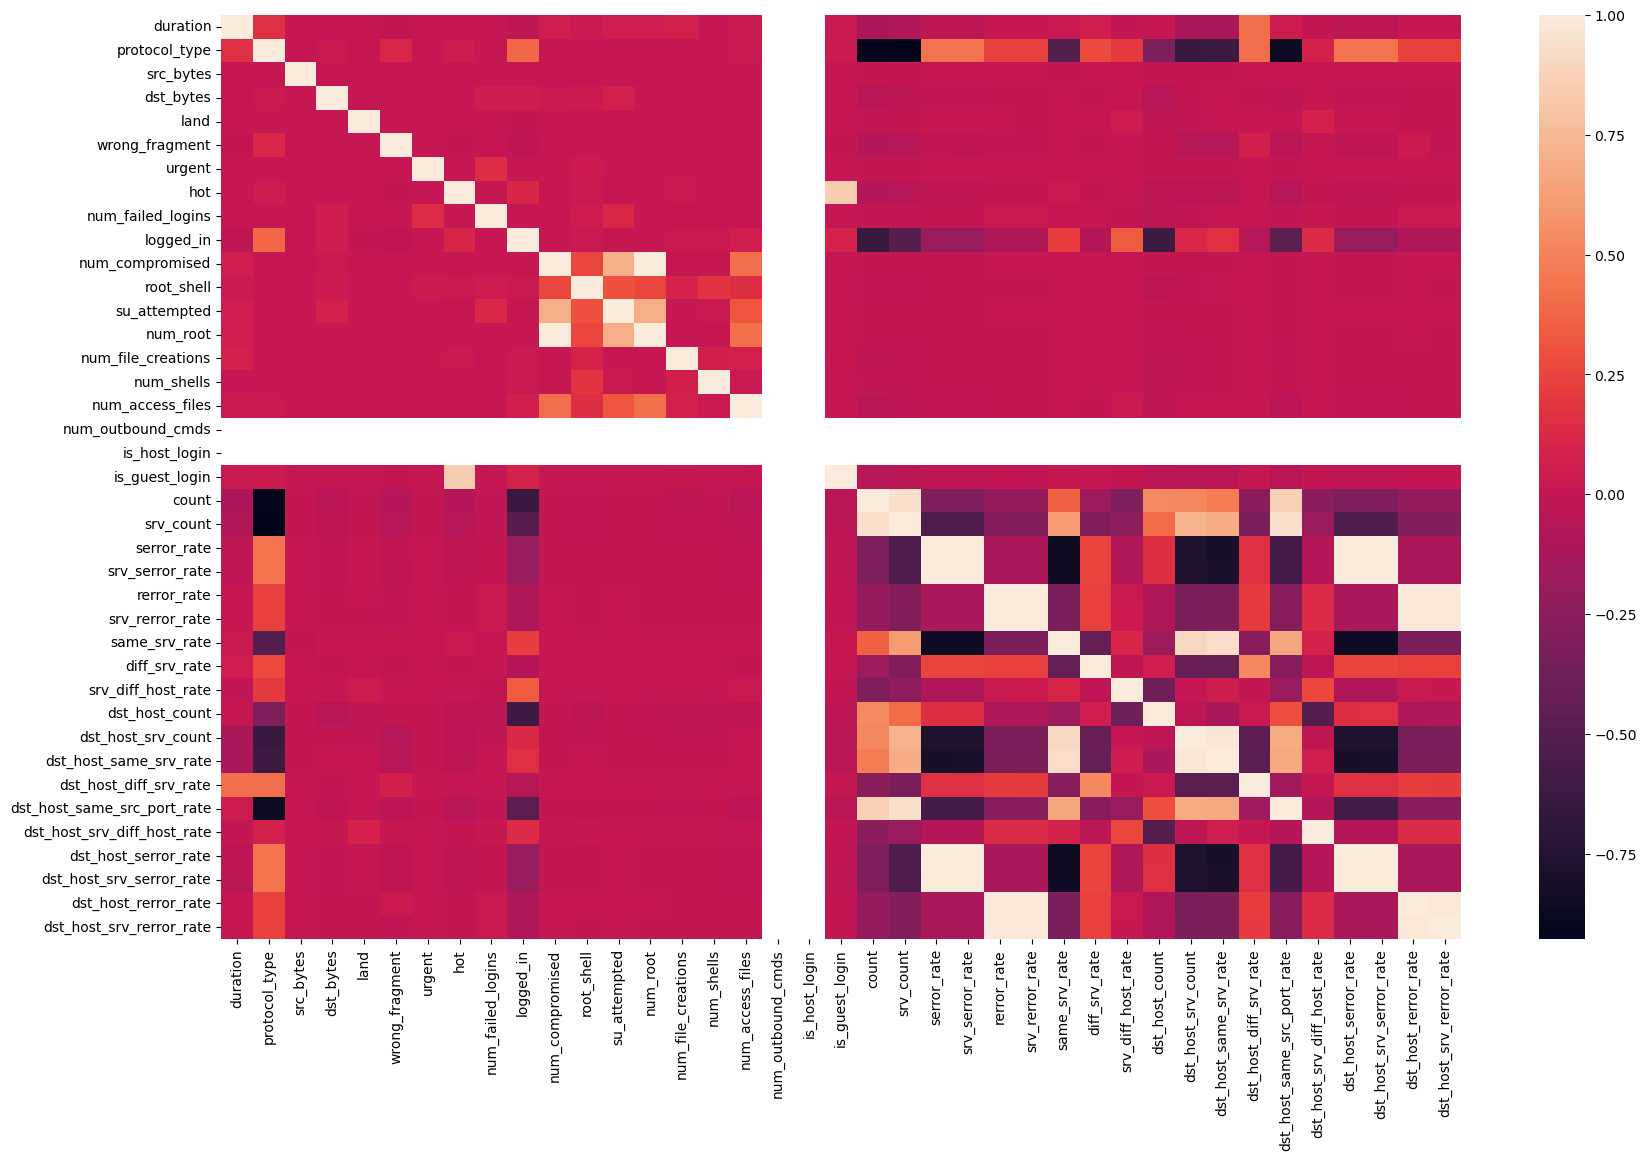

In [22]:
plt.figure(figsize =(20, 12)) 
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix) 
plt.show()

In [23]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target'],
      dtype='object')

In [24]:
columns_to_drop = ['num_outbound_cmds', 'is_host_login', 'num_compromised', 'serror_rate', 'srv_serror_rate', 'srv_rerror_rate', ]

In [25]:
df.drop(columns = columns_to_drop, inplace=True)

In [26]:
df.shape

(494020, 36)

In [27]:
one_hot_service = pd.get_dummies(df['service'])

In [28]:
df.drop(columns=['service'], inplace=True)

In [29]:
df = df.join(one_hot_service)

In [30]:
one_hot_flag = pd.get_dummies(df['flag'])
df.drop(columns=['flag'], inplace=True)
df = df.join(one_hot_flag)

In [31]:
df.head()

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,2,181,5450,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,2,239,486,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,2,235,1337,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,2,219,1337,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,2,217,2032,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [32]:
df.shape

(494020, 111)

In [33]:
X = df.drop(columns=['target'])
y = df['target']

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_scaled = scaler.fit_transform(X)

In [37]:
X_scaled

array([[-0.06779179,  0.9257548 , -0.00287853, ..., -0.00449917,
         0.55264377, -0.01471861],
       [-0.06779179,  0.9257548 , -0.00281984, ..., -0.00449917,
         0.55264377, -0.01471861],
       [-0.06779179,  0.9257548 , -0.00282389, ..., -0.00449917,
         0.55264377, -0.01471861],
       ...,
       [-0.06779179,  0.9257548 , -0.00285627, ..., -0.00449917,
         0.55264377, -0.01471861],
       [-0.06779179,  0.9257548 , -0.00276722, ..., -0.00449917,
         0.55264377, -0.01471861],
       [-0.06779179,  0.9257548 , -0.00284008, ..., -0.00449917,
         0.55264377, -0.01471861]])

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [40]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(395216, 110) (395216,)
(98804, 110) (98804,)


In [41]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score 
  
clfg = GaussianNB() 
start_time = time.time() 
clfg.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 

Training time:  0.8808078765869141


In [42]:
start_time = time.time() 
y_test_pred = clfg.predict(X_test) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 

Testing time:  0.18734002113342285


In [43]:
print("Train score is:", clfg.score(X_train, y_train)) 
print("Test score is:", clfg.score(X_test, y_test)) 

Train score is: 0.7141942633901461
Test score is: 0.7154062588559168


In [44]:
from sklearn.tree import DecisionTreeClassifier 
clfd = DecisionTreeClassifier(criterion ="entropy") 
start_time = time.time() 
clfd.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 

Training time:  1.6988139152526855


In [45]:
start_time = time.time() 
y_test_pred = clfd.predict(X_test) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 

Testing time:  0.03455400466918945


In [46]:
print("Train score is:", clfd.score(X_train, y_train)) 
print("Test score is:", clfd.score(X_test, y_test)) 

Train score is: 1.0
Test score is: 0.9995749159953038


In [47]:
from sklearn.ensemble import RandomForestClassifier 
clfr = RandomForestClassifier(n_estimators = 50) 
start_time = time.time() 
clfr.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 

Training time:  9.684803247451782


In [48]:
start_time = time.time() 
y_test_pred = clfr.predict(X_test) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 

Testing time:  0.2941107749938965


In [49]:
print("Train score is:", clfr.score(X_train, y_train)) 
print("Test score is:", clfr.score(X_test, y_test)) 

Train score is: 1.0
Test score is: 0.9996457633294199


In [50]:
y_test_pred_random_forest = clfr.predict(X_test)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_random_forest))

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78354
      normal       1.00      1.00      1.00     19366
       probe       1.00      0.99      0.99       834
         r2l       0.99      0.94      0.97       235
         u2r       0.90      0.60      0.72        15

    accuracy                           1.00     98804
   macro avg       0.98      0.91      0.94     98804
weighted avg       1.00      1.00      1.00     98804



#### Testing time of the models

<BarContainer object of 3 artists>

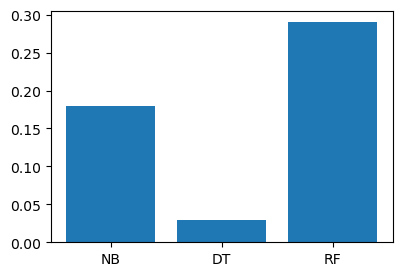

In [55]:
names = ['NB', 'DT', 'RF'] 
values = [0.18, 0.03, 0.29] 
plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values) 

#### Test Accuracy of the models

<BarContainer object of 3 artists>

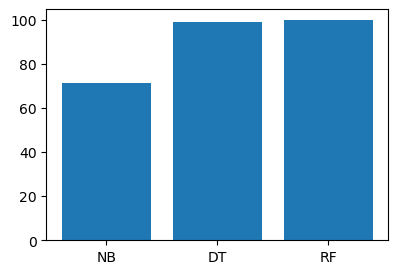

In [54]:
names = ['NB', 'DT', 'RF'] 
values = [71.54, 99.05, 99.97] 
plt.figure(figsize =(15, 3), num = 10) 
plt.subplot(131) 
plt.bar(names, values) 